# Catan Mini Project

As an avid catan player, I have experienced some fun times with my family and friends. One thing that intrigued me was the amount of 3's my friend kept rolling one game in which he benefited from and ended up winning (for 2-dice rolls, a 3 has a 2/36 chance of being rolled). Obviously it is possible that a single number can be rolled more often than usual, but sometimes, I really wonder if the amount of times a number is or isn't rolled is statistically significant. In this mini-project, I create a function which reads in a csv file with at least 1 column called "player_name" and one called "roll", finds the most significant number rolled (number that is rolled with the most variability) based on its probability, and determines whether or not the results are statistically significant. Without a large enough sample size, the results will not be accurate, so it is important to have over 500 rolls documented (about 9-10 games). Enjoy!

Alternate Hypothesis: The amount of times a particular number was rolled is unusual and significant.              
Null Hypothesis: The dice is fair and the amount of times that particular number was rolled is random.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
%matplotlib inline

In [4]:
def catan_rolls_significance(csv):
    roll_nums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    catan_data = pd.read_csv(csv) # reading in csv
    print("Here are the first 10 rows of the table:")
    print(catan_data.head(10))
    total_turns = catan_data.shape[0] # total rolls in the game
    grouped_data = pd.DataFrame(catan_data.groupby("roll")["player_name"].count()).rename(columns={"player_name":"count"})
    rolls_list = grouped_data["count"].tolist() # Grouping table by the roll and getting a list of the amount of each roll
    two_dice_prob = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36] # probability of each number rolled
    rolls_game = [i / total_turns for i in rolls_list] # Multiplying probability by amount of rolls: expected count per roll
    # test statistic: Max difference of observed and predicted % of rolls / turn
    diffs = [abs(o - p) for (o, p) in zip(rolls_game, two_dice_prob)] # subtracting empirical and predicted values
    max_diff = max(diffs) # finding the max difference
    min_diff = min(diffs) # finding the min difference
    real_diff = min_diff
    if min_diff + max_diff > 0:
        real_diff = max_diff
    roll = diffs.index(real_diff) + 2 # finding the roll
    roll_odds = two_dice_prob[roll - 2] # probability of this roll
    counts = np.array([])
    # Simulating value for null sample difference 10000 times
    for i in np.arange(10000):
        sample_nums = np.random.choice(roll_nums, 10000, p = two_dice_prob) # sample distribution
        new_count = np.count_nonzero(sample_nums == 4) / 10000 - roll_odds # sample test statistic
        counts = np.append(counts, new_count) # appending each one to array
    plots.hist(counts, density = True, bins = 15) # plotting histogram
    plots.scatter(real_diff, 0, color='red', s=30) # plotting original test statistic
    if real_diff > 0:
        p_value = np.count_nonzero(counts >= real_diff) / 10000 # calculating p-value
    else: 
        p_value = np.count_nonzero(counts <= real_diff) / 10000 # calculating p-value
    if p_value < .05:
        result = "The data show that the results for the roll {} over the course of {} rolls are significant, with a p-value of {}. Therefore, we fail to reject the null hypothesis.".format(roll, total_turns, p_value)
    else:
        result = "The data show that the results for the roll {} over the course of {} rolls are insignificant, with a p-value of {}. Therefore, we reject the null hypothesis.".format(roll, total_turns, p_value)
    if total_turns < 500:
        result += "\nWarning: results may not be accurate as sample size is too small!"
    print(result)

Here are the first 10 rows of the table:
  player_name  roll  round
0       Devin    11      1
1        Jack     9      1
2      Sydney     9      1
3      Koosha    12      1
4       Daisy    11      1
5       Devin     7      2
6        Jack     2      2
7      Sydney     4      2
8      Koosha     7      2
9       Daisy     7      2
The data show that the results for the roll 11 over the course of 55 rolls are significant, with a p-value of 0.0028. Therefore, we fail to reject the null hypothesis.


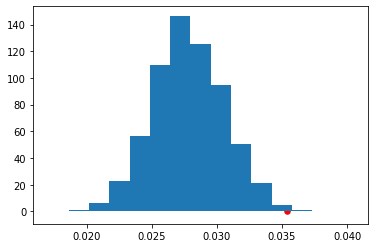

In [5]:
catan_rolls_significance("./catan_1.csv")